# Problem 2 - Answers

**The Monty Hall Problem**

## Problem statement (from the problem sheets) - canonical variation (a)

> In a game, you can pick one of three doors, labelled A, B and C. Behind one of
the three doors lies a highly desirable prize, such as the solutions to next summer’s
exams. After you have chosen, but not opened, one door (e.g., door A) the person
who is presenting the game opens one of the remaining two doors so as to reveal that
there is no prize behind it (e.g., door C might be opened). Notice that the gameshow
presenter knows that the door he opens has no prize behind it. At this point you can
either stick with your original choice (door A) or switch to the door which remains
closed (door B). At the end, all doors are opened, at which point you will only win if
the prize is behind your chosen door. Should you stick with your choice or is it better
to switch? Justify your answers.

### Setup

In [1]:
%matplotlib inline

import string
from collections import Counter
from numbers import Number

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Homogenise matplotlib plotting.
mpl.rc("axes", grid=True)
mpl.rc("grid", linestyle="--", alpha=0.4)
mpl.rc("legend", loc="best")

### Define a function which 'plays' the game once with an option to switch or stay

In [2]:
def monty_hall(switch=False, rng=None):
    """Return the result of one iteration of the Monty Hall problem.
    
    Parameters
    ----------
    switch : bool
        If true, switch when the host opens on of the two remaining doors.
    rng : numpy random Generator or None
        Generator which can be used to make runs repeatable if given.
        
    Returns
    -------
    outcome : bool
        True if the winning door was guessed correctly, false otherwise.
    
    """
    if rng is None:
        # Initialise the random number generator.
        rng = np.random.default_rng()

    # We want 3 doors.
    doors = tuple(string.ascii_uppercase[:3])

    # To make debugging easier, we can use the door names 'A', 'B', and 'C' directly.

    # Choose the door containing the prize.
    prize_door = rng.choice(doors)

    # Choose a door randomly.
    chosen_door = rng.choice(doors)

    # The host opens one of the remaining doors randomly, provided there is no prize behind it.
    remaining_doors = [door for door in doors if door not in (chosen_door, prize_door)]
    open_door = rng.choice(remaining_doors)

    # Depending on the `switch` option, switch.
    if switch:
        # Calculate the doors which are available, i.e. not opened.
        available_doors = [
            door for door in doors if door not in (open_door, chosen_door)
        ]
        assert len(available_doors) == 1
        chosen_door = available_doors[0]

    # Determine the outcome.
    return chosen_door == prize_door

### Play the game _without_ switching

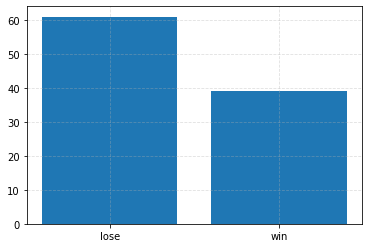

In [3]:
# Make runs repeatable.
rng = np.random.default_rng(0)

# Play the game multiple times.
outcomes = [monty_hall(rng=rng) for i in range(100)]
plt.figure(figsize=(6, 4))
plt.bar(*zip(*Counter(outcomes).items()))
_ = plt.xticks([0, 1], ["lose", "win"])

### Play the game _with_ switching

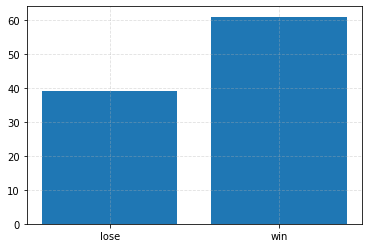

In [4]:
# Make runs repeatable.
rng = np.random.default_rng(0)

# Play the game multiple times.
outcomes = [monty_hall(switch=True, rng=rng) for i in range(100)]
plt.figure(figsize=(6, 4))
plt.bar(*zip(*Counter(outcomes).items()))
_ = plt.xticks([0, 1], ["lose", "win"])

## Problem statement (from the problem sheets) - variation (b)

>  In a variation, after you have chosen door A, you are given the choice to open one
of the remaining doors B or C. Notice that this time, the person opening the door
does not know whether the prize is behind it or not. You pick door C, and upon
opening it you discover there is nothing behind it. At this point you are again free to
either stick with door A or to switch to door B. Are the probabilities different from
the previous scenario? Justify your answers.

In [5]:
def monty_hall_b(switch=False, rng=None):
    """Return the result of one iteration of the varied Monty Hall problem.
    
    Parameters
    ----------
    switch : bool
        If true, switch again after having opened one door without winning.
    rng : numpy random Generator or None
        Generator which can be used to make runs repeatable if given.
        
    Returns
    -------
    outcome : bool
        True if the winning door was guessed correctly, false otherwise.
    
    """
    if rng is None:
        # Initialise the random number generator.
        rng = np.random.default_rng()

    # We want 3 doors.
    doors = tuple(string.ascii_uppercase[:3])

    # To make debugging easier, we can use the door names 'A', 'B', and 'C' directly.

    # Choose the door containing the prize.
    prize_door = rng.choice(doors)

    # Choose a door randomly.
    chosen_door = rng.choice(doors)

    # Pick a second door such that no prize is behind it.
    second_chosen_door = rng.choice(
        [door for door in doors if door not in (prize_door, chosen_door)]
    )

    if second_chosen_door == prize_door:
        # If the correct door was picked, the game is won!
        return True

    # Since the prize was not behind `second_chosen_door`, one now has the option
    # between sticking with the original `chosen_door`, or switching.
    if switch:
        # Calculate the doors which are available, i.e. not opened.
        available_doors = [
            door for door in doors if door not in (chosen_door, second_chosen_door)
        ]
        assert len(available_doors) == 1
        chosen_door = available_doors[0]

    # Determine the outcome.
    return chosen_door == prize_door

### Play the game _without_ switching

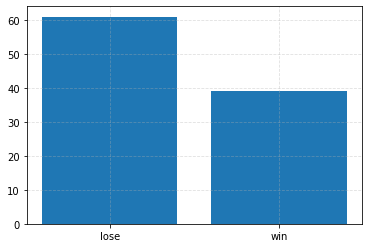

In [6]:
# Make runs repeatable.
rng = np.random.default_rng(0)

# Play the game multiple times.
outcomes = [monty_hall_b(rng=rng) for i in range(100)]
plt.figure(figsize=(6, 4))
plt.bar(*zip(*Counter(outcomes).items()))
_ = plt.xticks([0, 1], ["lose", "win"])

### Play the game _with_ switching

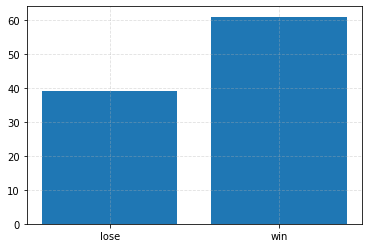

In [7]:
# Make runs repeatable.
rng = np.random.default_rng(0)

# Play the game multiple times.
outcomes = [monty_hall_b(switch=True, rng=rng) for i in range(100)]
plt.figure(figsize=(6, 4))
plt.bar(*zip(*Counter(outcomes).items()))
_ = plt.xticks([0, 1], ["lose", "win"])